# Clustering
You should build an end-to-end machine learning pipeline using a clustering model. In particular, you should do the following:
- Load the `customers` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Choose a few clustering algorithms, such as [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [hdbscan](https://hdbscan.readthedocs.io/en/latest/), and [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).
- Train and evaluate clustering models (i.e., the clustering algorithm and its hyperparameters) to find out the best-performing model using clustering evaluation metrics, such as [elbow method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) and the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

Importing the required Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering,HDBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

Importing the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/customers.csv')

Exploratory Data Analysis (EDA)

In [3]:
df.head(3)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0


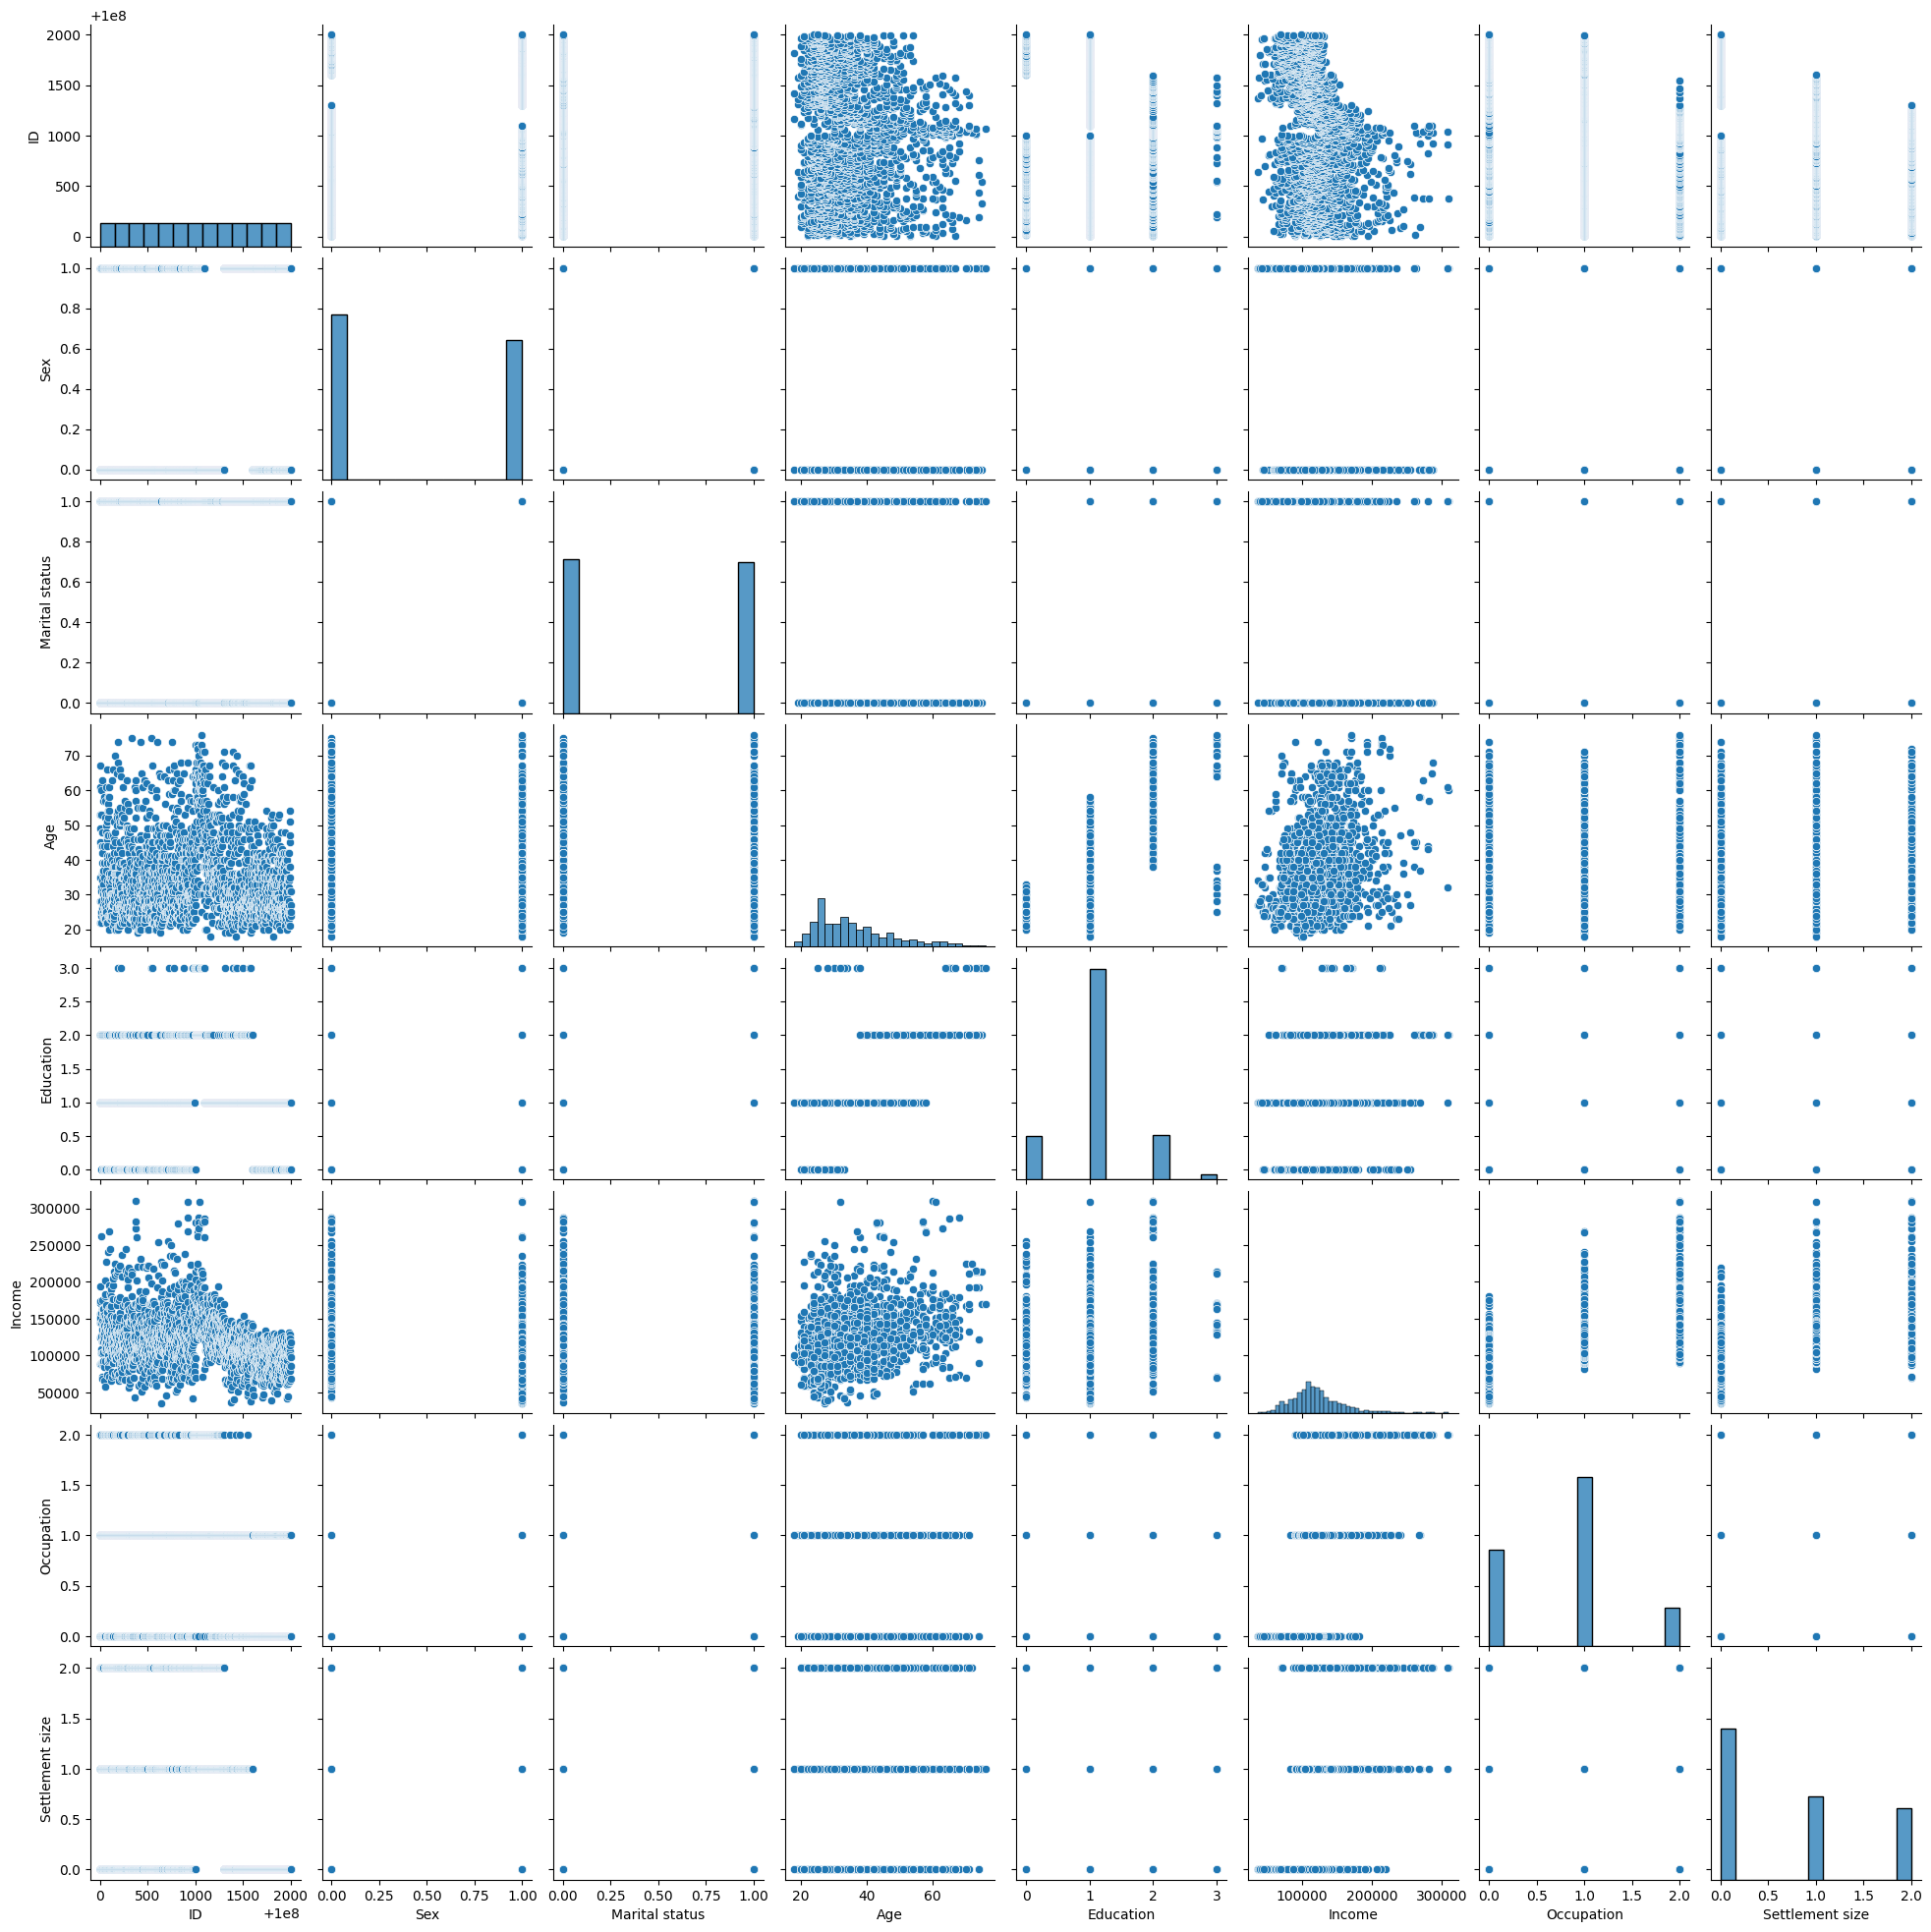

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
df.isnull().sum()

,0
ID,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [6]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


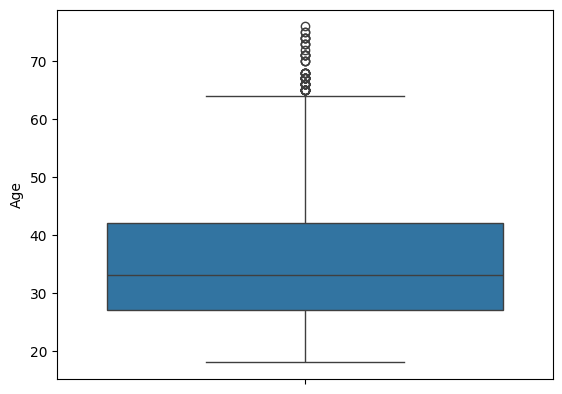

In [7]:
sns.boxplot(df['Age'])
plt.show()

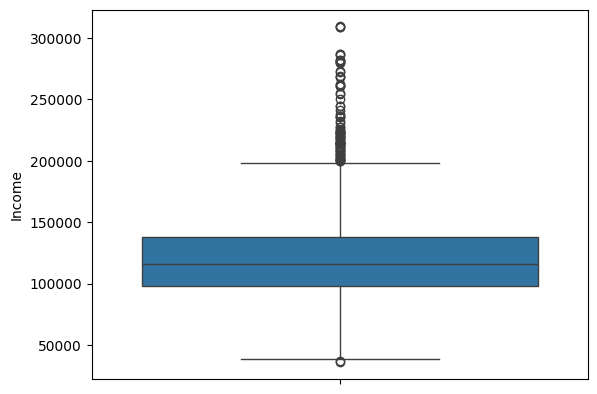

In [8]:
sns.boxplot(df['Income'])
plt.show()

Data Preprocessing

In [9]:
x = df.drop('ID',axis=1)

Feature Engineering

In [10]:
# scaler = StandardScaler()
# x = scaler.fit_transform(x)

# After performing scaling i observe that the silhouette score is getting decreased so i will not perform scaling

Model Training

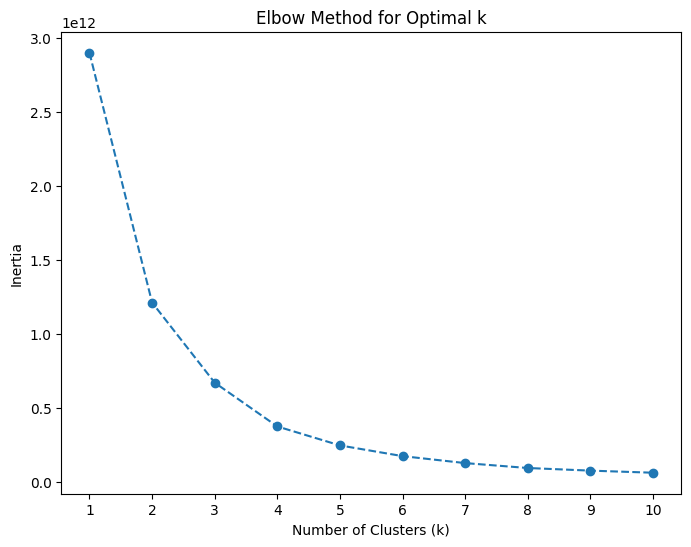

In [11]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.xticks(k_values)
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

So here we consider the elbow point 4 so we will be having 4 number of clusters

Model Training

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(x)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [31]:
db = HDBSCAN(min_samples=5)
db.fit(x)

HDBSCAN(min_samples=5)

In [23]:
ag = AgglomerativeClustering(n_clusters=4)
ag.fit(x)
Z = linkage(x, method='ward')

Model Evaluation

In [24]:
sc = silhouette_score(x, kmeans.labels_)
print(sc)

0.5427949856722908


In [32]:
sc = silhouette_score(x, db.labels_)
print(sc)

0.38788817644513246


In [26]:
sc = silhouette_score(x, ag.labels_)
print(sc)

0.5317617689963741


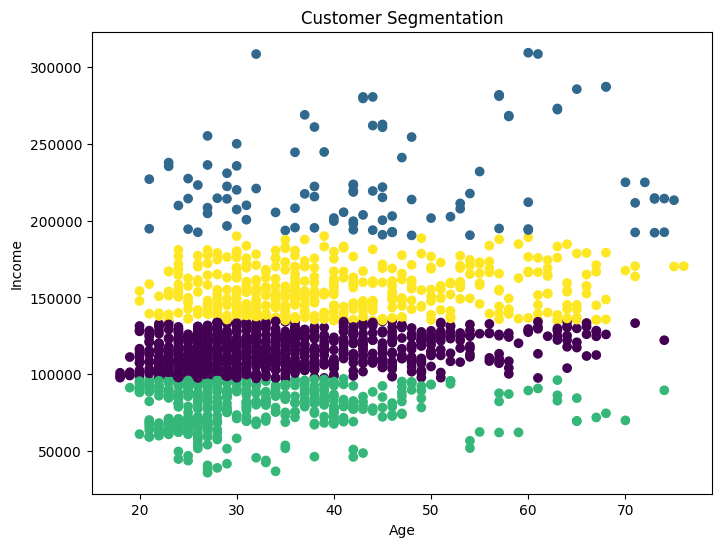

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(x['Age'], x['Income'], c=kmeans.labels_)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customer Segmentation")
plt.show()

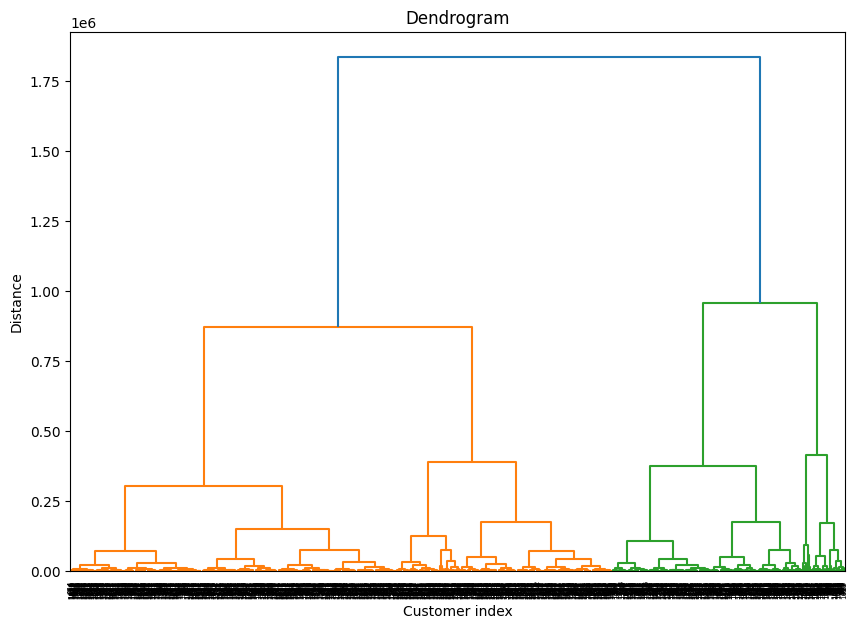

In [29]:
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customer index')
plt.ylabel('Distance')
plt.show()